In [2]:
import requests
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
forecast = requests.get("http://api.weatherapi.com/v1/forecast.json?key=4a1f9e155ac6494e98a15506222712&q=SE93HX&days=1&aqi=no&alerts=no")

In [4]:
print (f"Response code: {forecast.status_code}")

Response code: 200


In [5]:
df = pd.read_json(forecast.text)
df.head()

,location,current,forecast
name,Eltham,NaN,NaN
region,London,NaN,NaN
country,UK,NaN,NaN
lat,51.44,NaN,NaN
lon,0.06,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, name to forecastday
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  8 non-null      object
 1   current   23 non-null     object
 2   forecast  1 non-null      object
dtypes: object(3)
memory usage: 1.0+ KB


In [7]:
df.isna().sum()

location    24
current      9
forecast    31
dtype: int64

In [8]:
df.describe()

,location,current,forecast
count,8,23,1
unique,8,21,1
top,Eltham,0,"[{'date': '2023-04-01', 'date_epoch': 16803072..."
freq,1,3,1


In [9]:
df = df.fillna(0)

In [10]:
df_forecast = df["forecast"]


In [11]:
x = df.loc["forecastday"]["forecast"]

def convert(a):
    it = iter(a)
    res_dct = dict(zip(it, it))
    return res_dct

#print (convert(x))





In [12]:
column = []
df_forecast = df.forecast.loc["forecastday"]
df_forecast = np.array(df_forecast)

df_forecast = pd.DataFrame(df_forecast)

df_forecast

,0
0,"{'date': '2023-04-01', 'date_epoch': 168030720..."


In [13]:
print (df_forecast)

for i in df_forecast:
    print (df_forecast[i])

                                                   0
0  {'date': '2023-04-01', 'date_epoch': 168030720...
0    {'date': '2023-04-01', 'date_epoch': 168030720...
Name: 0, dtype: object


In [14]:
df_forecast

,0
0,"{'date': '2023-04-01', 'date_epoch': 168030720..."


In [15]:
type(df_forecast)

pandas.core.frame.DataFrame

In [16]:
x = [1, 2, 3, 4, 5]

x[::2]

[1, 3, 5]

In [17]:


forecast = df.loc["forecastday"]["forecast"]

forecast = pd.DataFrame(forecast)

In [18]:
forecast.columns

Index(['date', 'date_epoch', 'day', 'astro', 'hour'], dtype='object')

In [19]:
forecast

,date,date_epoch,day,astro,hour
0,2023-04-01,1680307200,"{'maxtemp_c': 9.2, 'maxtemp_f': 48.6, 'mintemp...","{'sunrise': '06:36 AM', 'sunset': '07:33 PM', ...","[{'time_epoch': 1680303600, 'time': '2023-04-0..."


In [20]:
x = df['forecast']["forecastday"]

x = pd.DataFrame(x)
x

,date,date_epoch,day,astro,hour
0,2023-04-01,1680307200,"{'maxtemp_c': 9.2, 'maxtemp_f': 48.6, 'mintemp...","{'sunrise': '06:36 AM', 'sunset': '07:33 PM', ...","[{'time_epoch': 1680303600, 'time': '2023-04-0..."


In [21]:
emission = pd.read_csv("greenhouse.csv")
print (max(emission.value))

7422207.96295139


In [22]:
emission.rename({"country_or_area": "country"}, axis=1, inplace=True)




In [23]:
emission.head()



,country,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [24]:
unique = emission.country.unique()

In [25]:
unique

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

In [26]:
emission.columns

Index(['country', 'year', 'value', 'category'], dtype='object')

In [27]:
Australia = emission[emission.country == "Australia"]

In [28]:
Australia

,country,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...
...,...,...,...,...
7319,Australia,1994,282.640896,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7320,Australia,1993,264.759156,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7321,Australia,1992,246.858849,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7322,Australia,1991,228.944834,sulphur_hexafluoride_sf6_emissions_in_kilotonn...


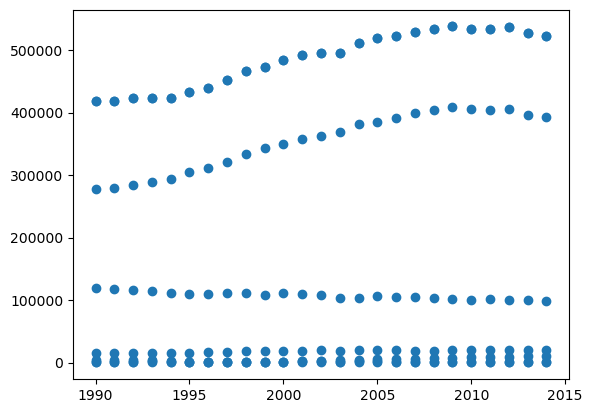

In [29]:
plt.scatter(Australia.year, Australia.value)

In [30]:
unique

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

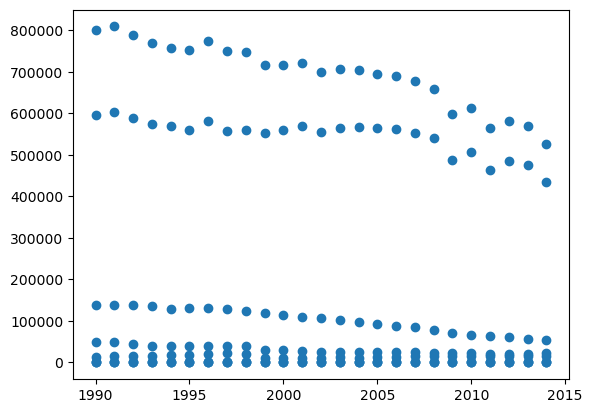

In [31]:
United_Kingdom = emission[emission.country == "United Kingdom"]
plt.scatter(United_Kingdom.year, United_Kingdom.value)

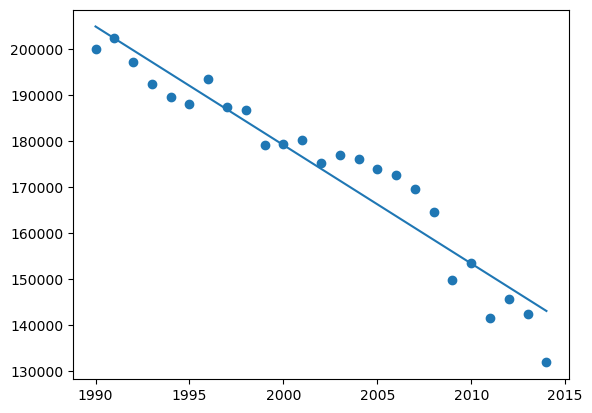

In [32]:
new = pd.DataFrame(United_Kingdom.groupby(["year"])["value"].mean())


new["Year"] = [i for i in new.index]

plt.scatter(new.Year, new.value)
reg = np.polyfit(new.Year, new.value, deg=1)
trend = np.polyval(reg, new.Year)
plt.plot(new.Year, trend)


In [33]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [34]:
df = pd.read_csv("greenhouse.csv")
df.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [35]:
australia = df[df.country_or_area == "Australia"]



australia = australia.pivot_table(columns=["category"], values="value", index="year")
print (type(australia))
print (australia)



<class 'pandas.core.frame.DataFrame'>
category  carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent  \
year                                                                                                                      
1990                                          278265.898941                                                               
1991                                          279741.639012                                                               
1992                                          284766.092718                                                               
1993                                          289142.267681                                                               
1994                                          293830.709141                                                               
1995                                          305162.543549                                          

In [36]:
australia.rename({"carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent": "co2__without_land_use",
                  "greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent": "co2_indirect_without_lulucf",
                  "greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent": "co2_greenhouse_gas_without_land_use",
                  'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent': "hydrofluorocarbons",
                  'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent': "methane_without_land_use",
                  'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent': "nitrous_oxide_without_land_use",
                  'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent': "perfluorocarbons",
                  'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent': "sulphur_hexafluoride"
                  }, inplace=True, axis=1)


australia.columns

Index(['co2__without_land_use', 'co2_indirect_without_lulucf',
       'co2_greenhouse_gas_without_land_use', 'hydrofluorocarbons',
       'methane_without_land_use', 'nitrous_oxide_without_land_use',
       'perfluorocarbons', 'sulphur_hexafluoride'],
      dtype='object', name='category')

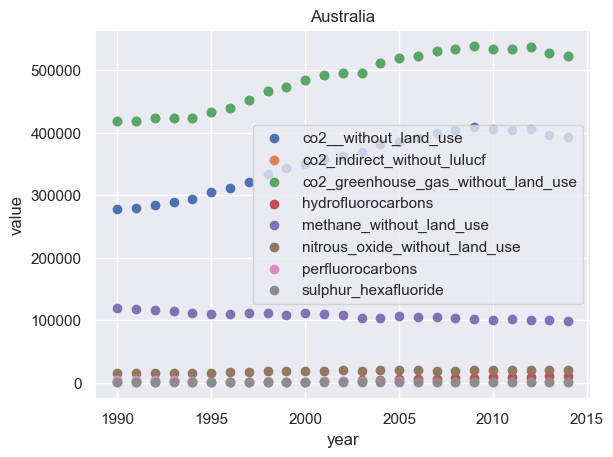

In [37]:
sns.set()
australia["year"] = [i for i in australia.index]
australia.index = [i for i in range(len(australia))]
for i in range(0, len(australia.columns) - 1):
    plt.scatter(x=australia["year"] , y=australia[australia.columns[i]])
plt.xlabel("year")
plt.ylabel("value")

plt.legend(australia.columns, loc=0)
plt.title("Australia")
plt.show()


In [38]:
australia.year

0     1990
1     1991
2     1992
3     1993
4     1994
5     1995
6     1996
7     1997
8     1998
9     1999
10    2000
11    2001
12    2002
13    2003
14    2004
15    2005
16    2006
17    2007
18    2008
19    2009
20    2010
21    2011
22    2012
23    2013
24    2014
Name: year, dtype: int64

In [39]:
len(australia)

australia.columns[25]

IndexError: index 25 is out of bounds for axis 0 with size 9

In [ ]:
australia = df[df.country_or_area == "Australia"]

australia = australia.groupby(["year"])["value"].mean()
australia = pd.DataFrame(australia)
australia["year"] = [i for i in australia.index]
australia

,value,year
year,,
1990,156983.643586,1990
1991,157002.771560,1991
1992,158655.040572,1992
1993,158911.849712,1993
1994,159034.859765,1994
1995,162554.494060,1995
1996,164926.485836,1996
1997,169395.644180,1997
1998,174893.292177,1998


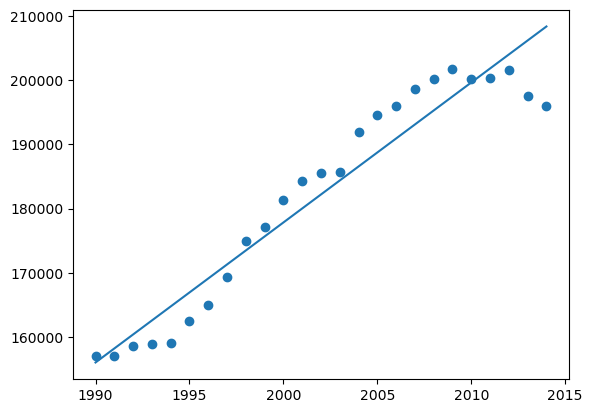

In [ ]:
plt.scatter(australia.year, australia.value)
import numpy as np

reg = np.polyfit(australia.year, australia.value, deg=1)
trend = np.polyval(reg, australia.year)
plt.plot(australia.year, trend)

In [ ]:
from scipy.stats import *

c, p = pearsonr(australia.year, australia.value)
print (f"Pearson test results: cor={c}, p={p}")


Pearson test results: cor=0.9591564777715229, p=4.165623201526104e-14


In [ ]:
0.9591564777715229 ** 2

0.919981148851074

<AxesSubplot: xlabel='year', ylabel='value'>

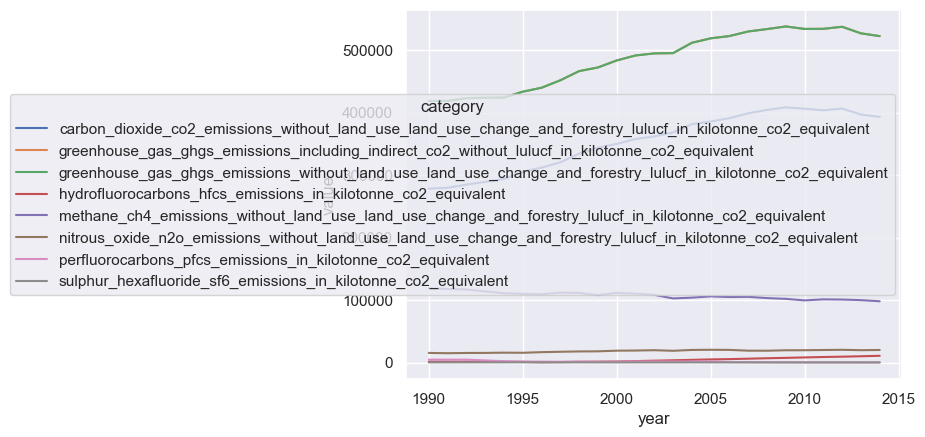

In [40]:
df = pd.read_csv("greenhouse.csv")
Australia = df[df.country_or_area == "Australia"]

import seaborn as sns
sns.lineplot(x="year", y="value", data=Australia, hue="category")

In [41]:
Australia

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...
...,...,...,...,...
7319,Australia,1994,282.640896,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7320,Australia,1993,264.759156,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7321,Australia,1992,246.858849,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7322,Australia,1991,228.944834,sulphur_hexafluoride_sf6_emissions_in_kilotonn...


In [45]:
new_df = Australia.pivot_table(columns="category", index="year", values="value")
new_df.columns

Index(['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent',
       'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent',
       'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent'],
      dtype='object', name='category')

In [50]:
new_df["year"] = [i for i in new_df.index]
len(new_df.columns)

9

In [58]:
count = 0
for i in new_df.columns:
    print (new_df[i])

year
1990    278265.898941
1991    279741.639012
1992    284766.092718
1993    289142.267681
1994    293830.709141
1995    305162.543549
1996    311914.819824
1997    320439.116819
1998    334328.142647
1999    343713.906948
2000    349885.433109
2001    357653.329899
2002    361861.387896
2003    368345.977425
2004    381519.261593
2005    385581.132806
2006    391134.100909
2007    398816.453544
2008    404237.828214
2009    408448.479000
2010    406200.993184
2011    403705.528314
2012    406462.847704
2013    396913.936530
2014    393126.946994
Name: carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent, dtype: float64
year
1990    418623.049563
1991    418674.057494
1992    423080.108191
1993    423764.932564
1994    424092.959373
1995    433478.650826
1996    439803.962228
1997    451721.717815
1998    466382.112472
1999    472245.990778
2000    483445.826665
2001    491441.695937
2002    494740.100777
2003    495154.085967
